# Palantir on donor P13 invading trophoblast

Trying with the denoised graph (in PAGA-like manner)

In [1]:
import palantir
import scanpy as sc
import numpy as np
import pandas as pd
import os

# Plotting 
import matplotlib
import matplotlib.pyplot as plt

# Inline plotting
%matplotlib inline

# Reset random seed
np.random.seed(5)

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [2]:
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
MulticoreTSNE       NA
PIL                 8.0.0
anndata             0.7.4
attr                19.3.0
backcall            0.1.0
cffi                1.13.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.1
fcsparser           0.2.1
get_version         2.1
h5py                2.10.0
igraph              0.8.3
importlib_metadata  0.23
ipykernel           5.1.3
ipython_genutils    0.2.0
jedi                0.15.1
joblib              0.14.0
kiwisolver          1.1.0
legacy_api_wrap     1.2
leidenalg           0.8.2
llvmlite            0.30.0
louvain             0.6.1
matplotlib          3.3.2
more_itertools      NA
mpl_toolkits        NA
natsort             6.2.0
networkx            2.4
numba               0.46.0
numexpr             2.7.0
numpy               1.17.4
packaging           19.2
palantir            1.0.0
pandas              0.25.3
parso               0.5.1
pexpect 

In [3]:
save_path = '/lustre/scratch117/cellgen/team292/aa22/adata_objects/202007_snRNA-seq_MFI/snRNA_seq_MFI_202007_adatas/202007_FINAL_analysis_with_souporcell_deconvolution_common_variants/donor_P13_analysis/'


In [4]:
np.random.seed(0)

In [5]:
adata = sc.read(save_path+'adata_VCT_EVT_with_trajectories_incl_EVT_3_new.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 2085 × 5048
    obs: 'age', 'batch', 'bh_pval', 'cell_id', 'dataset', 'donor', 'n_counts', 'n_genes', 'percent_mito', 'sample', 'scrublet_cluster_score', 'scrublet_score', 'technique', 'tissue_block', 'is_doublet', 'barcode', 'souporcell_assignment', 'inter_ind_doublet', 'S_score', 'G2M_score', 'phase', 'probabilities', 'celltype_predictions', 'louvain', 'origin_M_F', 'prelim_annot', 'louvain_R_13', 'louvain_R_5', 'rootcell', 'dpt_pseudotime', 'palantir_pseudotime', 'pseudotime_monocle3'
    var: 'gene_ids-0', 'feature_types-0', 'genome-0', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'gene_ids-1', 'feature_types-1', 'genome-1', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'gene_ids-2', 'feature_types-2', 'genome-2', 'n_cells-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm-2', 'gene_ids-3', 'feature_types-3', 'genome-3', 'n_cells-3', 'highly_variable

findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


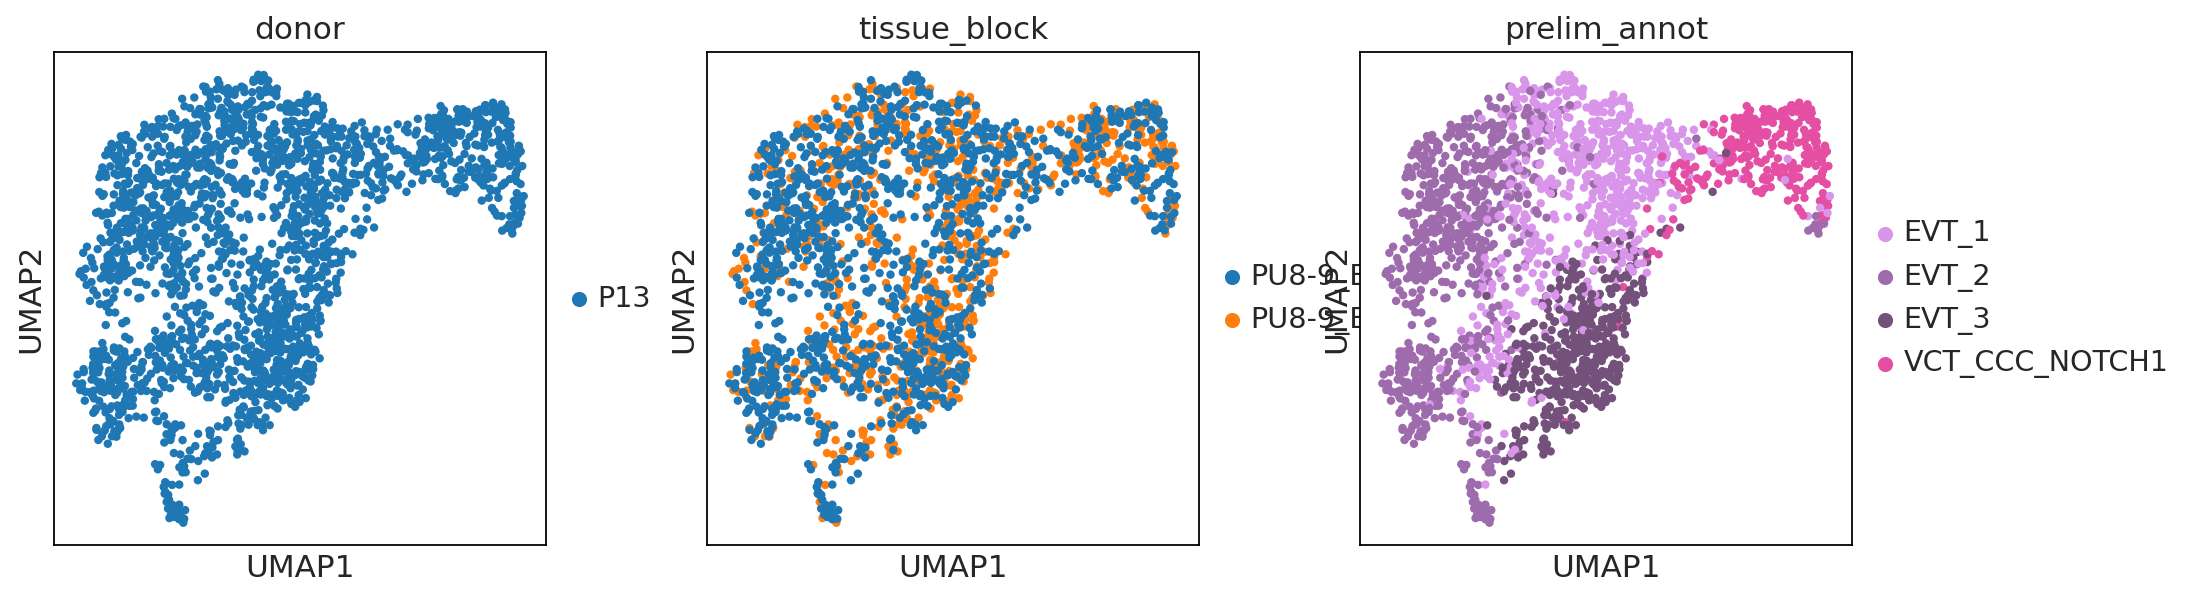

In [7]:
sc.pl.umap(adata,color=['donor','tissue_block','prelim_annot'])

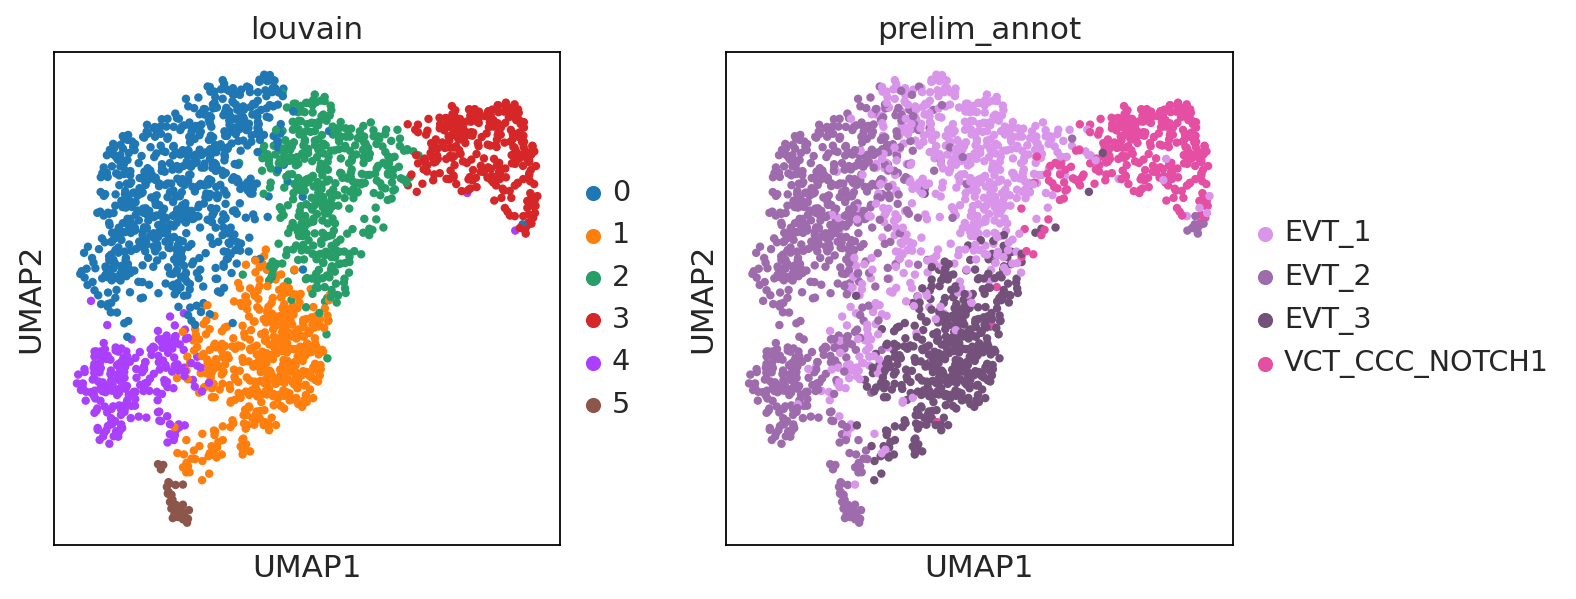

In [8]:
sc.pl.umap(adata, color=['louvain','prelim_annot'])

In [9]:
# overall this object has 50 PCs calculated but only 11 PCs were further used in analysis and manifold calucation
adata.varm['PCs'].shape

(5048, 50)

In [10]:
# Note in the manuscript, we did not use highly variable genes and hence use_hvg is set to False. 
# We recommend setting use_hvg to True for other datasets
pca_projections, _ = palantir.utils.run_pca(adata, use_hvg=False)

computing PCA
    with n_comps=300
    finished (0:00:06)


In [11]:
pca_projections.shape


(2085, 300)

In [15]:
sc.tl.diffmap(adata)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.990655   0.97888654 0.9744003  0.9652529  0.9583355
     0.93696034 0.9315895  0.9257452  0.92216015 0.92078346 0.9115217
     0.90702385 0.9023121  0.89553094]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


In [17]:
adata.obsm['X_diffmap']

array([[ 2.0719906e-02,  1.0597726e-02, -9.2253378e-03, ...,
        -1.6361948e-02,  4.4556547e-02,  2.8763609e-02],
       [ 2.0937439e-02,  1.2490364e-02, -4.6713016e-04, ...,
        -8.4520271e-03, -6.5820427e-03, -3.0034954e-02],
       [ 2.2058494e-02, -5.2225031e-02,  1.1885007e-02, ...,
        -1.0768998e-02, -7.8288028e-03,  1.3423096e-02],
       ...,
       [ 2.2057256e-02,  8.4934318e-03, -1.8632500e-02, ...,
         7.4253152e-03, -4.1194763e-02,  8.3775688e-03],
       [ 2.2826305e-02, -6.4720012e-02,  2.2504479e-02, ...,
         9.2345491e-02,  1.6618110e-02, -5.1738020e-02],
       [ 2.2182841e-02,  1.2441064e-02,  3.7838342e-03, ...,
         7.0507653e-05,  2.2290461e-02,  8.6663021e-03]], dtype=float32)

In [18]:
sc.pp.neighbors(adata, use_rep='X_diffmap') # or other pseudotime metric

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [19]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


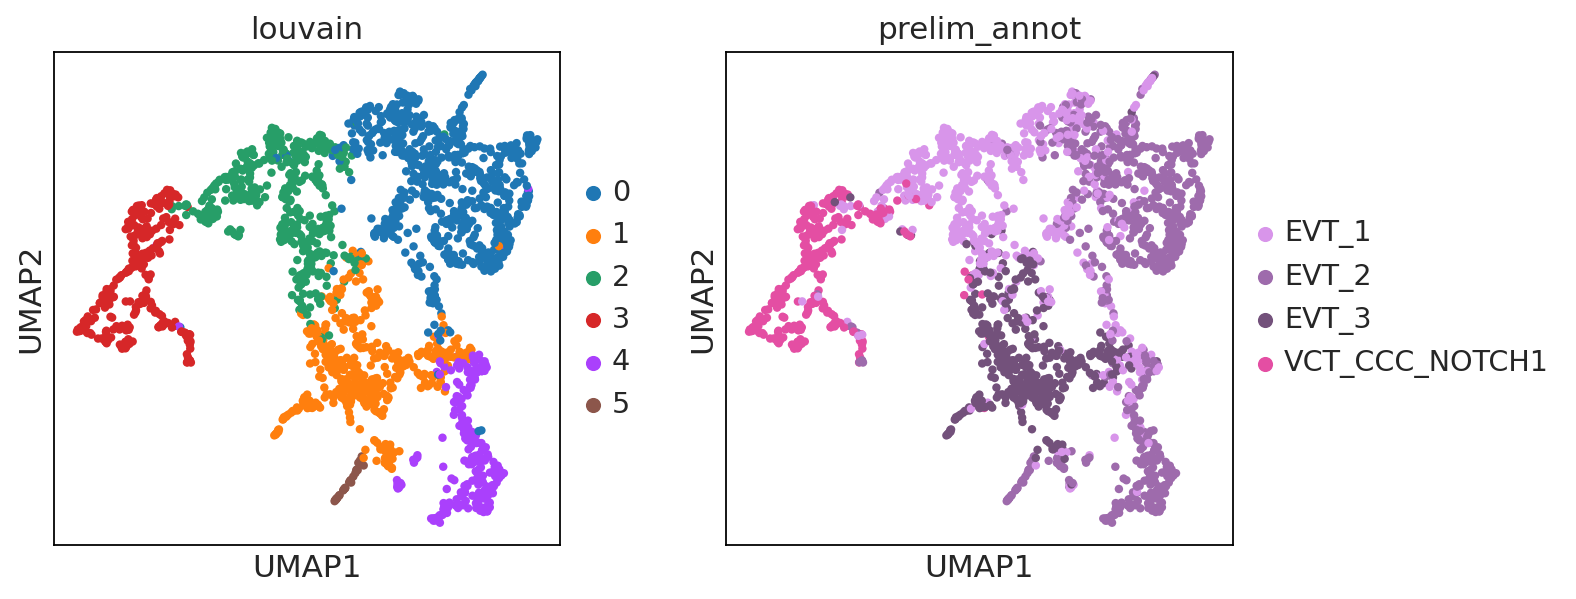

In [21]:
sc.pl.umap(adata, color=['louvain','prelim_annot'])

In [23]:
umap_denoised = pd.DataFrame(adata.obsm['X_umap'], index = adata.obs_names,
                            columns=['x','y'])

In [24]:
# Run diffusion maps
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=11)


Determing nearest neighbor graph...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [25]:
dm_res

{'T': <2085x2085 sparse matrix of type '<class 'numpy.float64'>'
 	with 117896 stored elements in Compressed Sparse Row format>,
 'EigenVectors':                            0         1         2         3         4  \
 index                                                                  
 AAAGTCCCACTCGATA-1    0.0219  0.010825 -0.009017 -0.007283 -0.016384   
 AACAACCAGTCCTGCG-1    0.0219  0.018400  0.010442 -0.006048 -0.016432   
 AACACACCACTGAGGA-1    0.0219 -0.061470  0.033649  0.013644 -0.000556   
 AACCAACAGGTGGTTG-1    0.0219 -0.042260  0.012127  0.012583  0.021038   
 AACCATGGTTCCTAAG-1    0.0219  0.002815 -0.016346  0.000625  0.002064   
 ...                      ...       ...       ...       ...       ...   
 TTTAGTCGTCATCGGC-1    0.0219 -0.010598 -0.016155  0.006657  0.015838   
 TTTATGCCAGATACCT-1    0.0219  0.007862 -0.017531 -0.000072 -0.016578   
 TTTGACTCAGGAATAT-1    0.0219  0.013297  0.000379 -0.003390 -0.024302   
 TTTGGAGTCCACAAGT-1-1  0.0219 -0.057448  0.034330  0

In [26]:
ms_data = palantir.utils.determine_multiscale_space(dm_res)


In [27]:
# requires 'pip install harmonyTS'
import harmony
fdl = harmony.plot.force_directed_layout(dm_res['kernel'], adata.obs_names)

100%|██████████| 500/500 [00:10<00:00, 45.48it/s]

BarnesHut Approximation  took  5.78  seconds
Repulsion forces  took  4.46  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.32  seconds
AdjustSpeedAndApplyForces step  took  0.19  seconds


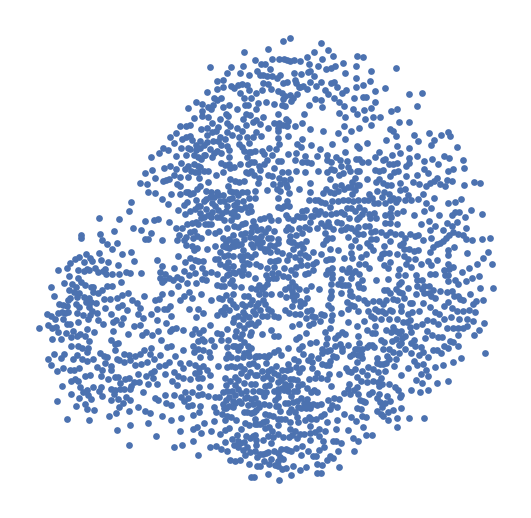

In [28]:
fig, ax = palantir.plot.plot_tsne(fdl)


In [29]:
fdl

x           y
index                                        
AAAGTCCCACTCGATA-1     463.015616  696.827681
AACAACCAGTCCTGCG-1    1024.571250  424.101171
AACACACCACTGAGGA-1   -2136.940581 -232.187955
AACCAACAGGTGGTTG-1   -1665.346221 -268.540358
AACCATGGTTCCTAAG-1     -84.067661  314.278046
...                           ...         ...
TTTAGTCGTCATCGGC-1    -871.881844 -372.204769
TTTATGCCAGATACCT-1     245.359868   73.680170
TTTGACTCAGGAATAT-1     739.644377  168.121143
TTTGGAGTCCACAAGT-1-1 -1962.407784 -238.393866
TTTGGAGTCTCAGGCG-1     587.733862 -782.189279

[2085 rows x 2 columns]

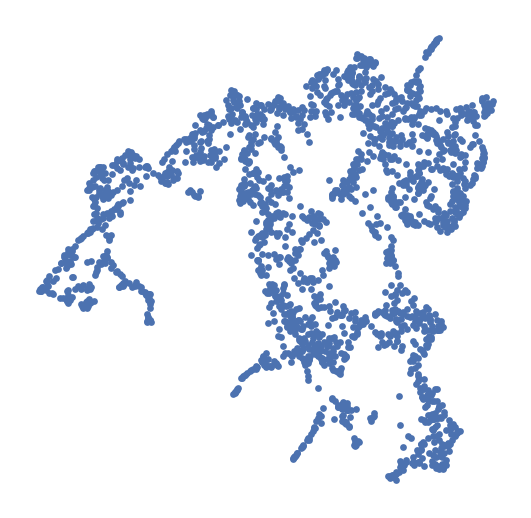

In [30]:
fig, ax = palantir.plot.plot_tsne(umap_denoised)


findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


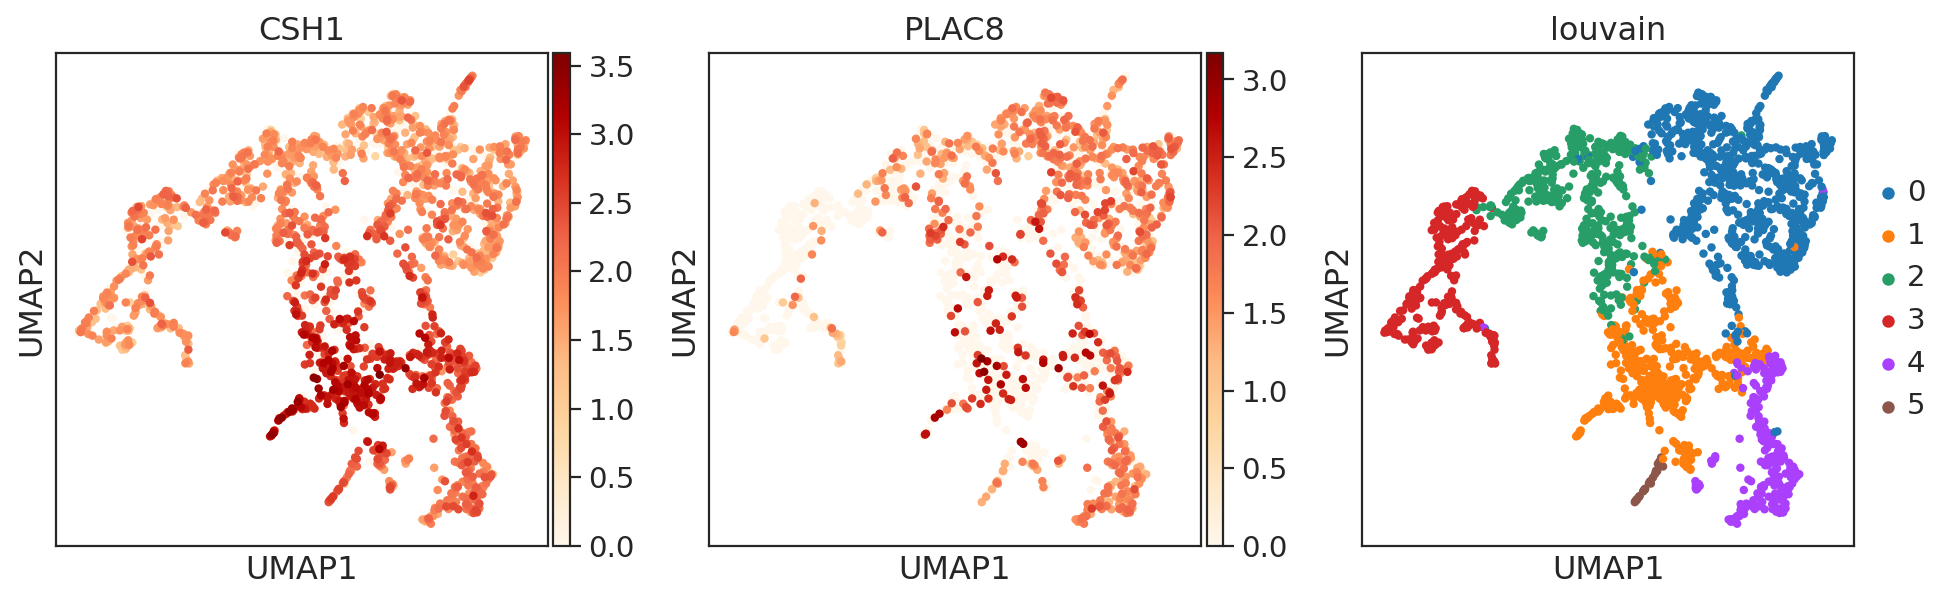

In [31]:
sc.pl.umap(adata, color=['CSH1','PLAC8','louvain'], cmap='OrRd')

In [32]:
import scipy
adata.X = scipy.sparse.csr_matrix(adata.X)

In [33]:
imp_df = palantir.utils.run_magic_imputation(adata, dm_res)


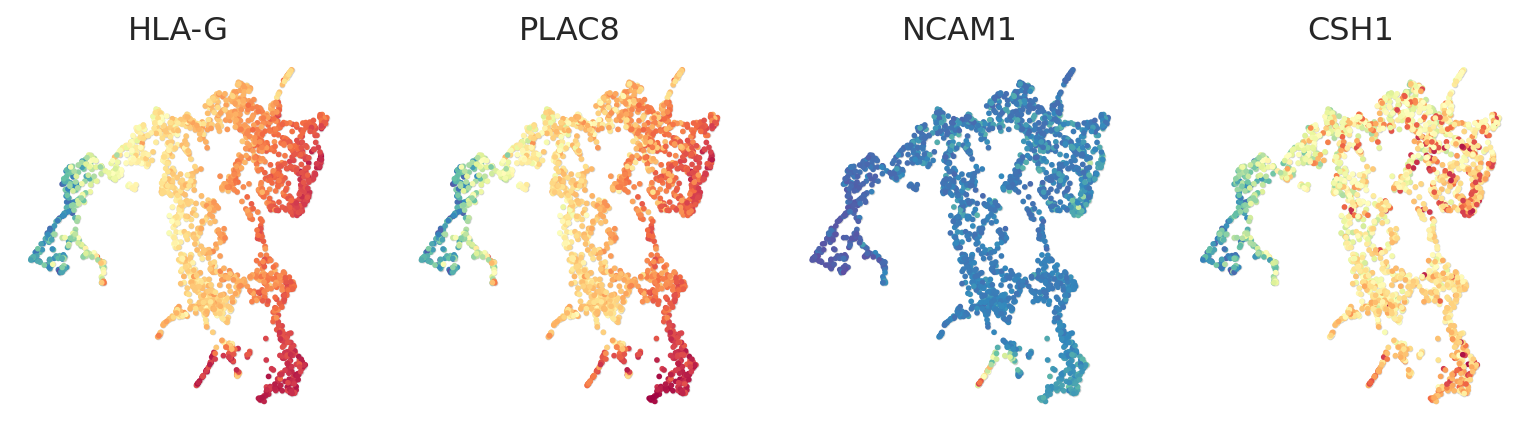

In [35]:
palantir.plot.plot_gene_expression(imp_df, umap_denoised, ['HLA-G', 'PLAC8', 'NCAM1', 'CSH1'])


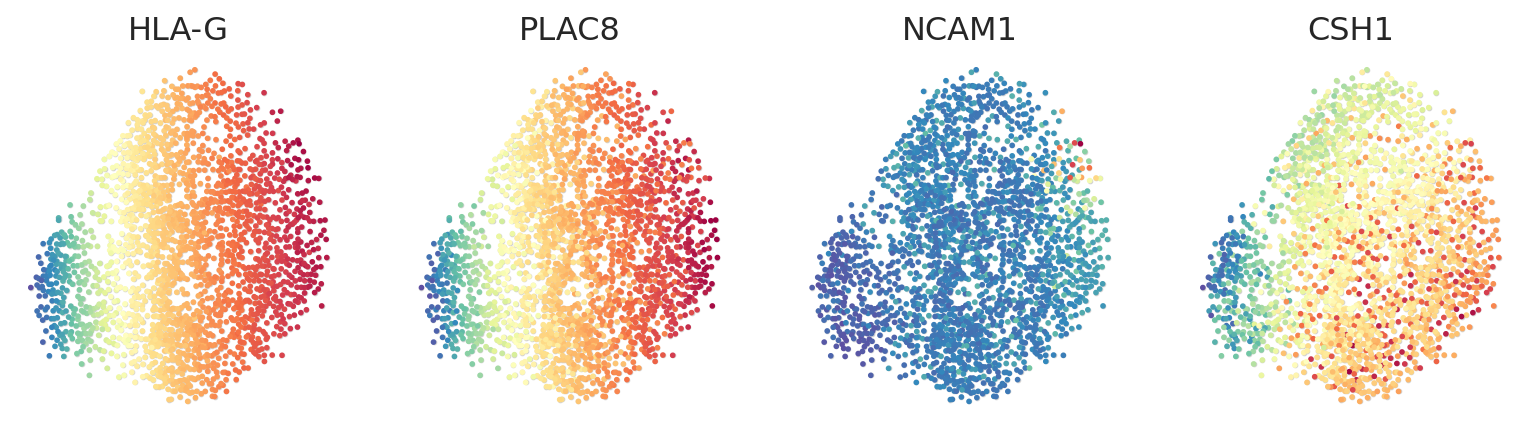

In [36]:
palantir.plot.plot_gene_expression(imp_df, fdl, ['HLA-G', 'PLAC8', 'NCAM1', 'CSH1'])


findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


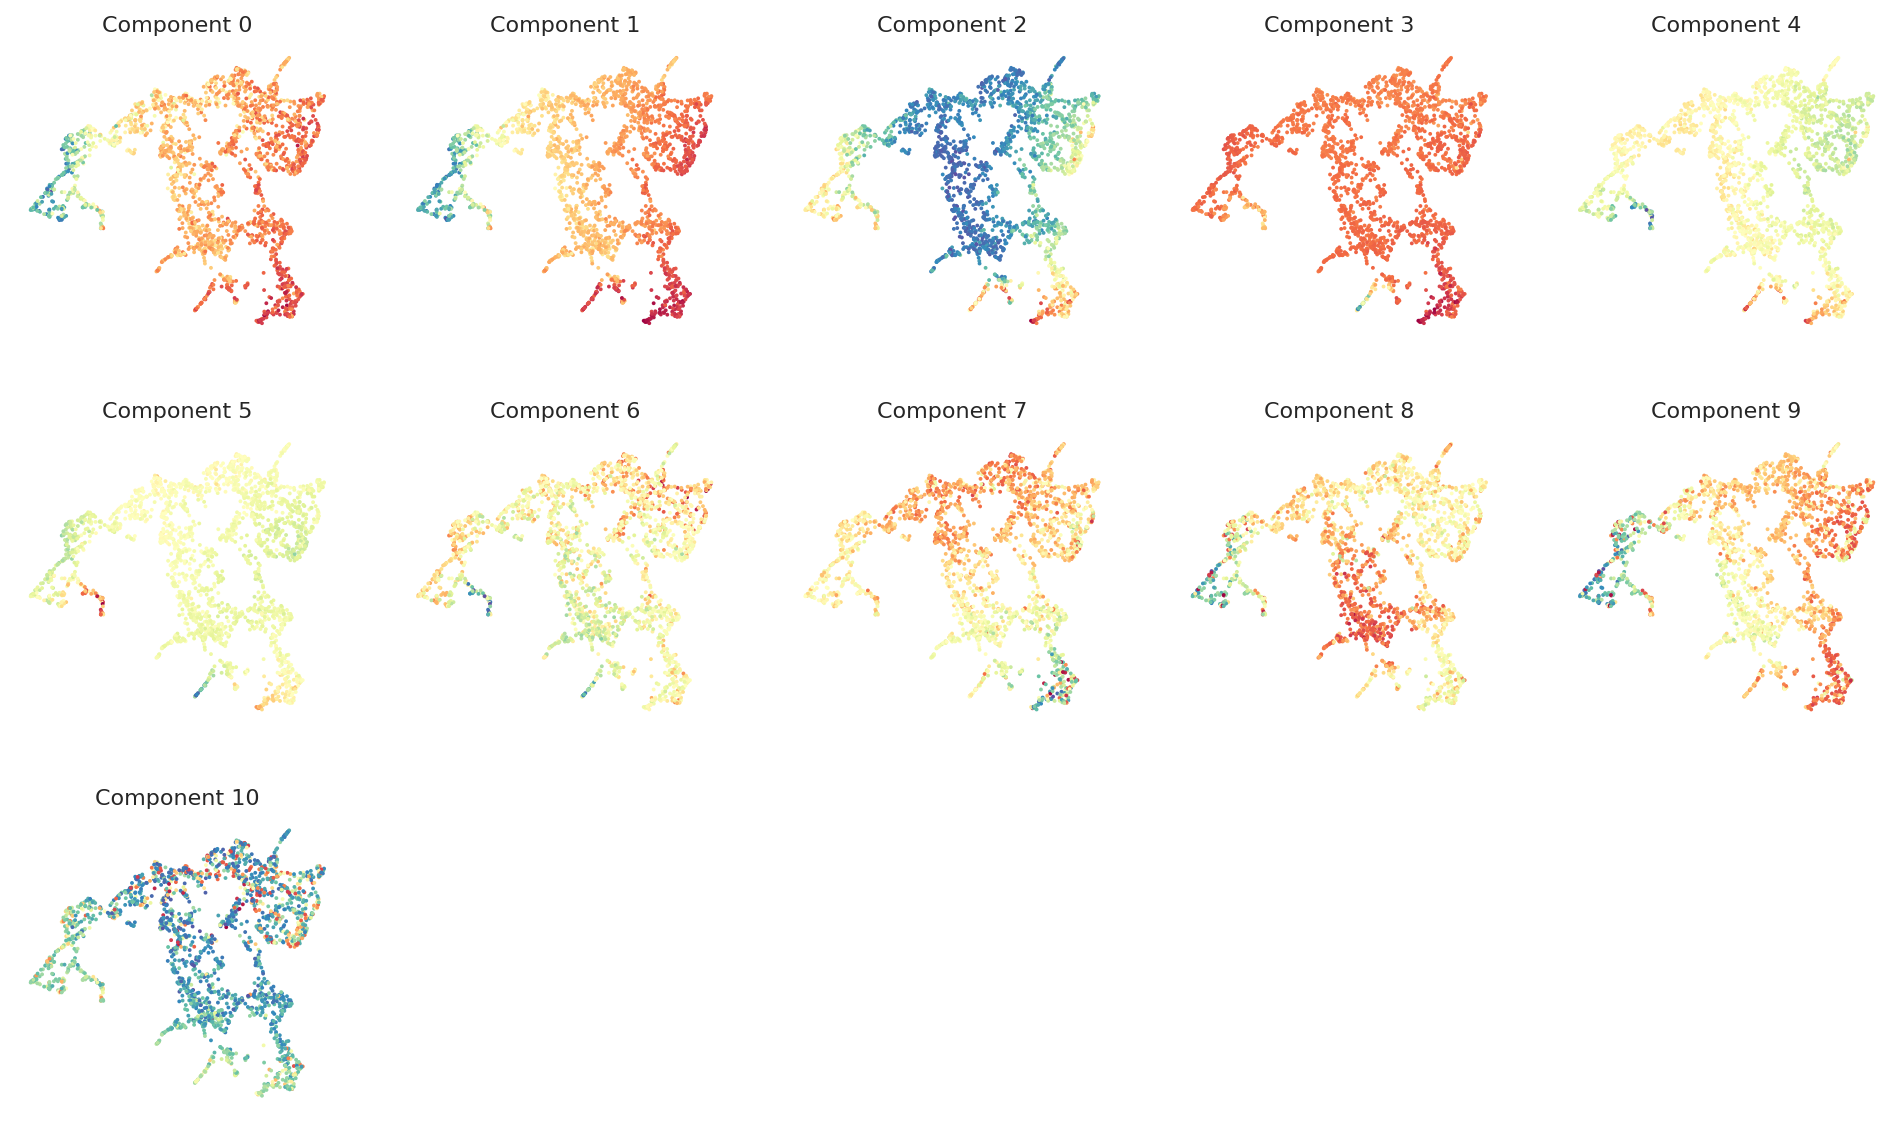

In [38]:
palantir.plot.plot_diffusion_components(umap_denoised, dm_res)


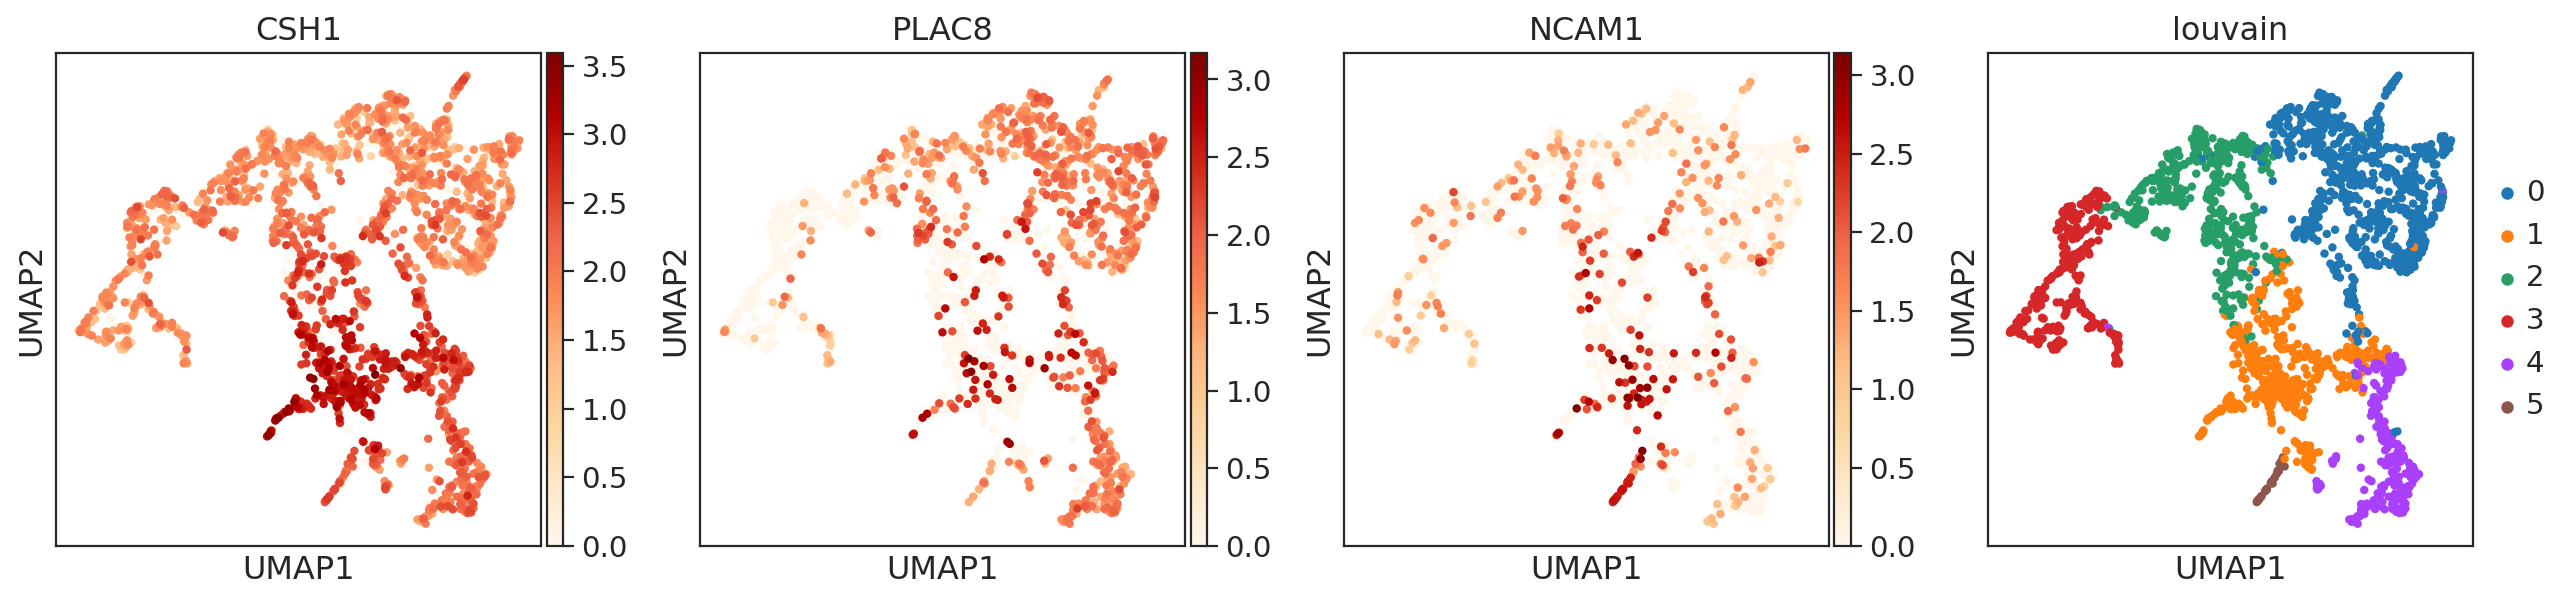

In [39]:
sc.pl.umap(adata, color=['CSH1','PLAC8','NCAM1','louvain'], cmap='OrRd')

In [40]:
adata_endoEVT = adata[adata.obs['louvain'] == '5']
dense_mtx = adata_endoEVT.X.todense()

In [41]:
adata_endoEVT.var_names

Index(['HES4', 'ISG15', 'AL390719.2', 'TNFRSF18', 'TNFRSF4', 'SDF4', 'PUSL1',
       'CPTP', 'MMP23B', 'NADK',
       ...
       'CALHM4', 'AC245884.10', 'POTEM', 'AL159169.3', 'AC116614.1',
       'PAPPA-AS2', 'AC021074.3', 'LGALS14', 'CGB8', 'AC105383.1'],
      dtype='object', name='index', length=5048)

In [42]:
NCAM1_list = list(dense_mtx[:,list(adata_endoEVT.var_names).index('NCAM1')])

In [43]:
NCAM1_list.index(max(NCAM1_list))

28

In [44]:
term_endoEVT_nucleus = list(adata_endoEVT.obs.index)[28]
term_endoEVT_nucleus

'TTACGTTAGTACCGGA-1'

In [45]:
adata_giant_cells = adata[adata.obs['louvain'] == '1']
dense_mtx = adata_giant_cells.X.todense()

In [46]:
adata_endoEVT.var_names

Index(['HES4', 'ISG15', 'AL390719.2', 'TNFRSF18', 'TNFRSF4', 'SDF4', 'PUSL1',
       'CPTP', 'MMP23B', 'NADK',
       ...
       'CALHM4', 'AC245884.10', 'POTEM', 'AL159169.3', 'AC116614.1',
       'PAPPA-AS2', 'AC021074.3', 'LGALS14', 'CGB8', 'AC105383.1'],
      dtype='object', name='index', length=5048)

In [47]:
CSH1_list = list(dense_mtx[:,list(adata_giant_cells.var_names).index('CSH1')])

In [48]:
CSH1_list.index(max(CSH1_list))

2

In [49]:
term_giant_nucleus = list(adata_giant_cells.obs.index)[2]
term_giant_nucleus

'AAGTCGTAGGTCGACA-1'

In [50]:
terminal_states = pd.Series(['endoEVT', 'giant_cell'], 
                           index=['TTACGTTAGTACCGGA-1', 'AAGTCGTAGGTCGACA-1'])

In [51]:
terminal_states

TTACGTTAGTACCGGA-1       endoEVT
AAGTCGTAGGTCGACA-1    giant_cell
dtype: object

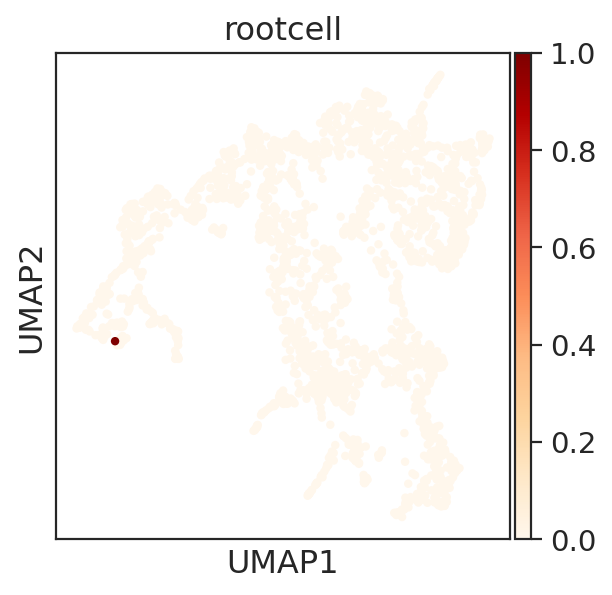

In [52]:
sc.pl.umap(adata, color='rootcell', cmap='OrRd')

In [53]:
rootcell = list(adata[adata.obs['rootcell'] == 1].obs.index)[0]

In [54]:
start_cell = rootcell
pr_res = palantir.core.run_palantir(ms_data, start_cell, num_waypoints=500, terminal_states=terminal_states.index)


Sampling and flocking waypoints...
Time for determining waypoints: 0.0014035582542419433 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.12680931886037192 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9971
Correlation at iteration 2: 0.9997
Correlation at iteration 3: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [55]:
pr_res.branch_probs.columns = terminal_states[pr_res.branch_probs.columns]

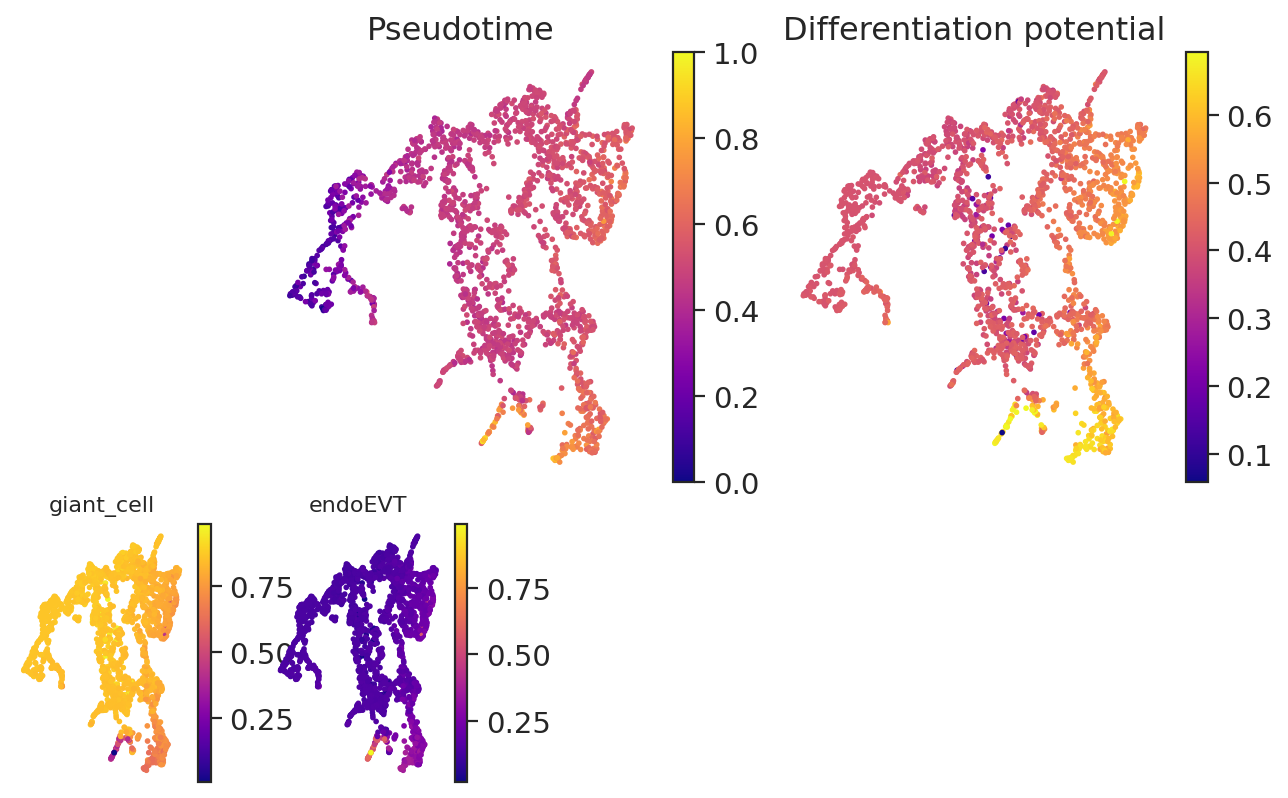

In [57]:
palantir.plot.plot_palantir_results(pr_res, umap_denoised)


In [58]:
pr_res.branch_probs.columns

Index(['giant_cell', 'endoEVT'], dtype='object')

In [59]:
pr_res.branch_probs

giant_cell   endoEVT
index                                     
AAAGTCCCACTCGATA-1      0.813187  0.186813
AACAACCAGTCCTGCG-1      0.780974  0.219026
AACACACCACTGAGGA-1      0.859841  0.140159
AACCAACAGGTGGTTG-1      0.862041  0.137959
AACCATGGTTCCTAAG-1      0.868411  0.131589
...                          ...       ...
TTTAGTCGTCATCGGC-1      0.858519  0.141481
TTTATGCCAGATACCT-1      0.844284  0.155716
TTTGACTCAGGAATAT-1      0.810483  0.189517
TTTGGAGTCCACAAGT-1-1    0.856737  0.143263
TTTGGAGTCTCAGGCG-1      0.833436  0.166564

[2085 rows x 2 columns]

In [60]:
adata.obs['giant_cell_pr_prob'] = pr_res.branch_probs['giant_cell']
adata.obs['endoEVT_pr_prob'] = pr_res.branch_probs['endoEVT']

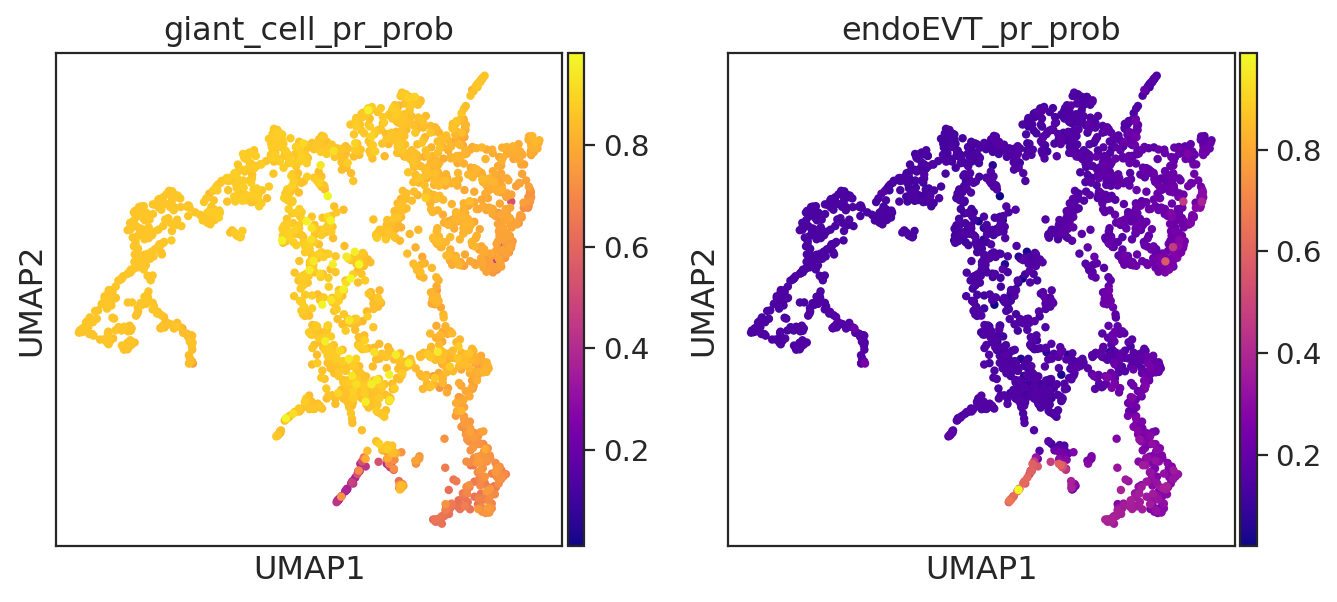

In [61]:
sc.pl.umap(adata, color=['giant_cell_pr_prob','endoEVT_pr_prob'], cmap='plasma')

findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


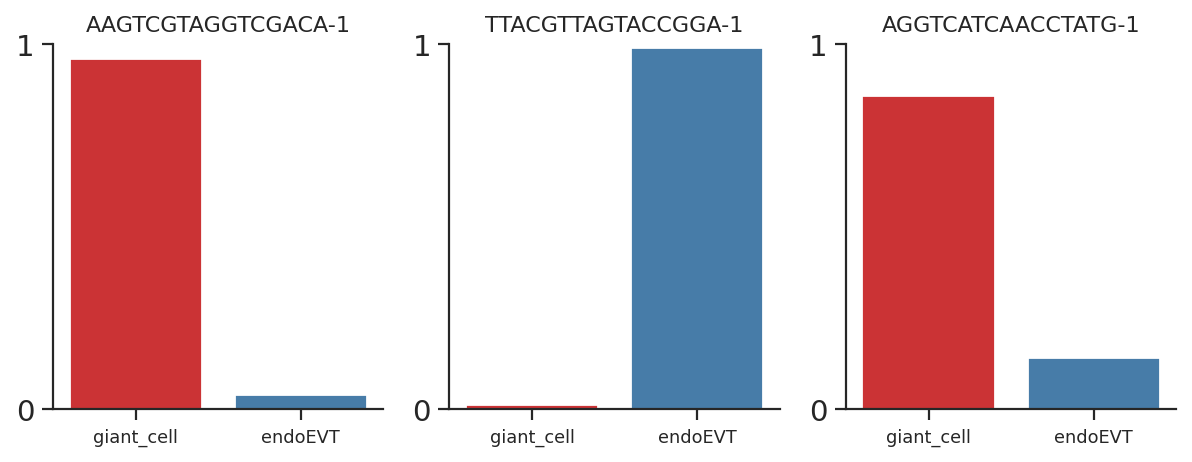

In [62]:
cells = [term_giant_nucleus, term_endoEVT_nucleus, rootcell]
palantir.plot.plot_terminal_state_probs(pr_res, cells)

(<Figure size 320x320 with 1 Axes>, <AxesSubplot:>)

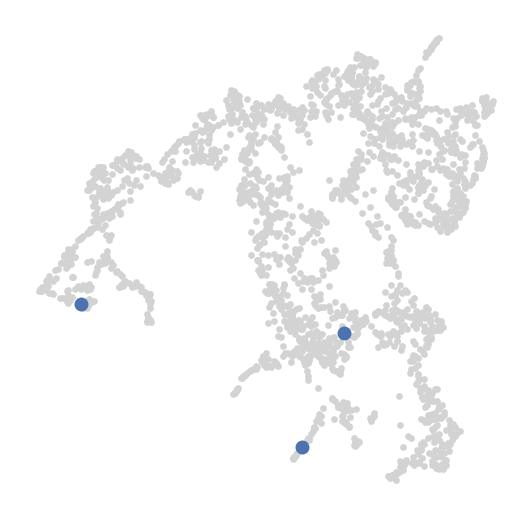

In [64]:
palantir.plot.highlight_cells_on_tsne(umap_denoised, cells)


In [65]:
# the following commands require 'gam' R package - installing with "install.packages('gam')" in Rstudio
genes = ['HLA-G','NCAM1','PLAC8','CSH1']
gene_trends = palantir.presults.compute_gene_trends( pr_res, imp_df.loc[:, genes])


giant_cell
Time for processing giant_cell: 0.04388995965321859 minutes
endoEVT
Time for processing endoEVT: 0.043922980626424156 minutes


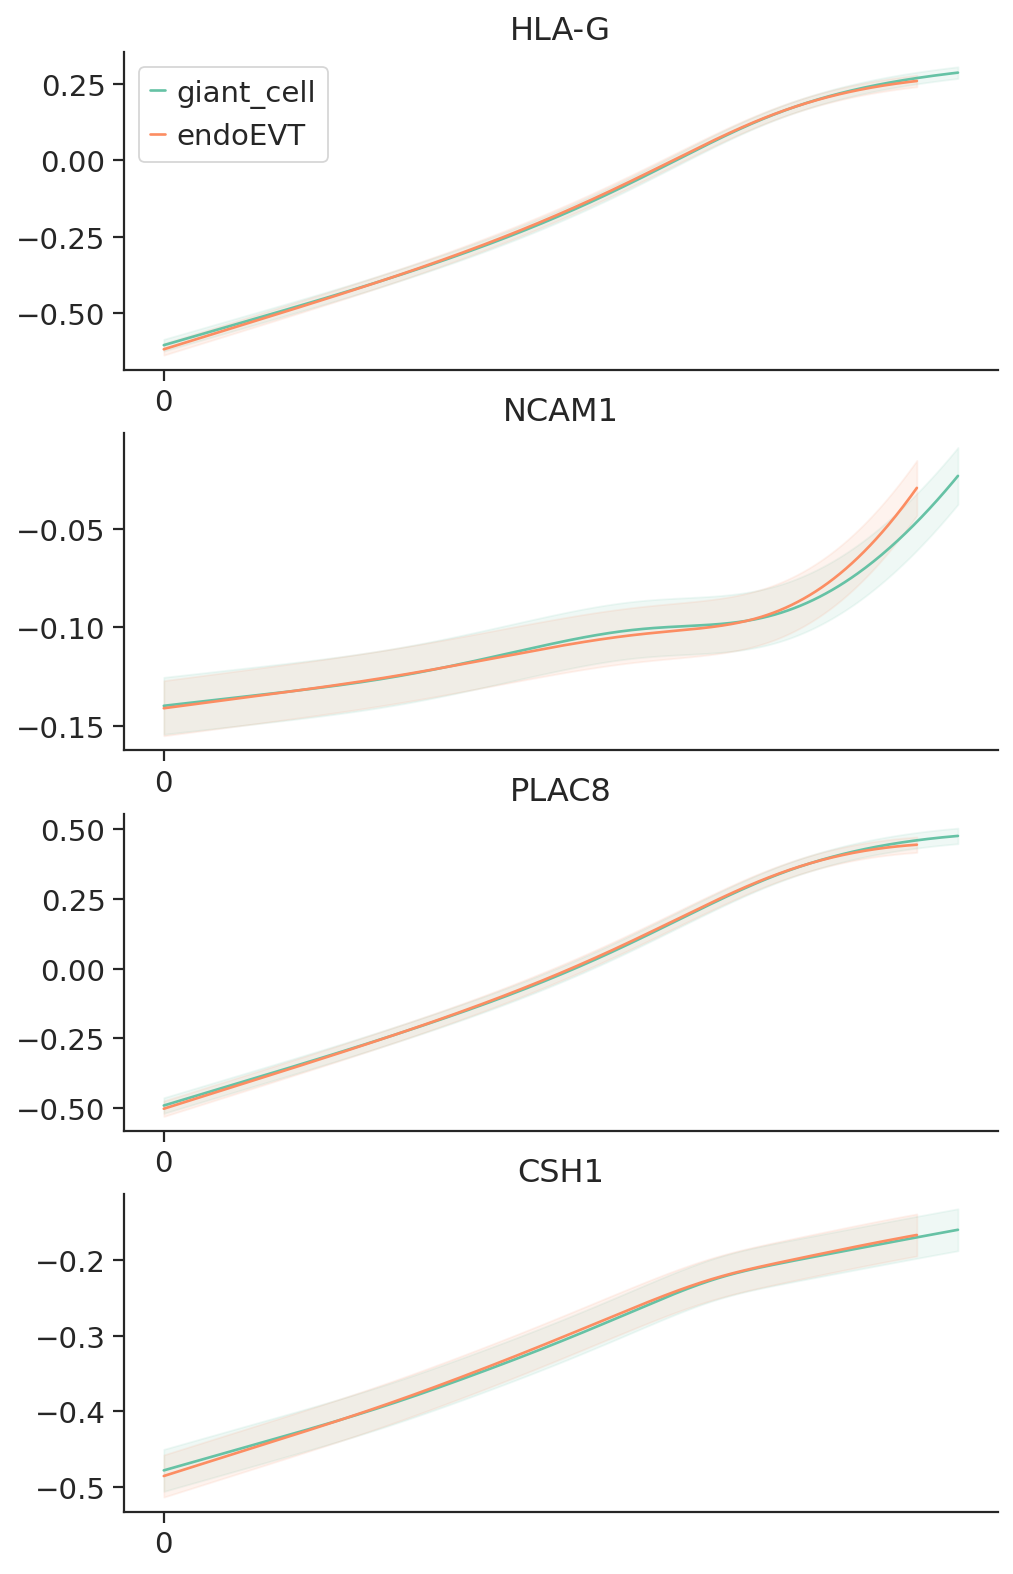

In [66]:
palantir.plot.plot_gene_trends(gene_trends)


findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


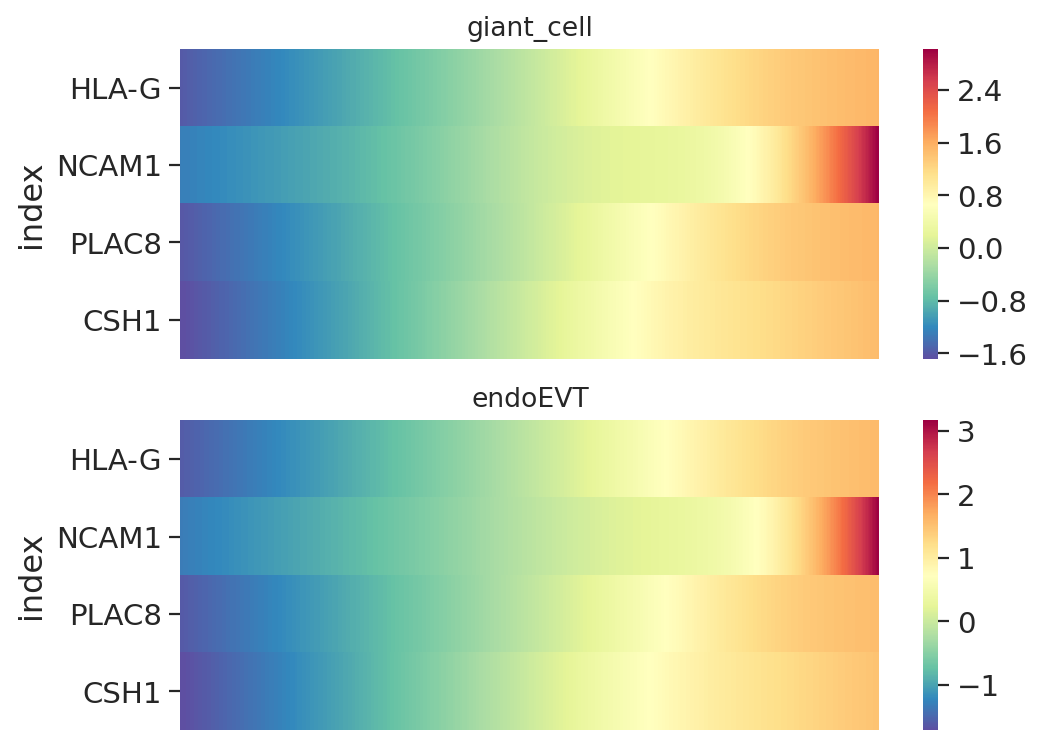

In [67]:
palantir.plot.plot_gene_trend_heatmaps(gene_trends)
